![image](https://github.com/eWaterCycle/ewatercycle/raw/main/docs/examples/logo.png)

# Generate forcing in eWaterCycle with ESMValTool

This notebooks shows how to generate forcing data for the Hype model using ERA5 data and [ESMValTool hydrological recipes](https://docs.esmvaltool.org/en/latest/recipes/recipe_hydrology.html#hype). More information about data, configuration and installation instructions can be found in the [System setup](https://ewatercycle.readthedocs.io/en/latest/system_setup.html) in the eWaterCycle documentation.

In [1]:
import logging
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

logger = logging.getLogger("esmvalcore")
logger.setLevel(logging.WARNING)

In [2]:
from rich import print

import ewatercycle.forcing

Forcing for Hype is created using the ESMValTool recipe. 
It produces one file per each variable: temperature, and precipitation. 
You can set the start and end date.

In [3]:
hype_forcing = ewatercycle.forcing.sources["HypeForcing"].generate(
    dataset="ERA5",
    start_time="1990-01-01T00:00:00Z",
    end_time="1990-12-31T00:00:00Z",
    shape="./data/Rhine_HYPE/Rhine_HYPE.shp",
)
print(hype_forcing)

{'diagnostic': 'hype',
 'variable_group': 'pr',
 'dataset': 'ERA5',
 'project': 'OBS6',
 'mip': 'day',
 'short_name': 'pr',
 'alias': 'ERA5',
 'frequency': 'day',
 'long_name': 'Precipitation',
 'modeling_realm': ['atmos'],
 'original_short_name': 'pr',
 'preprocessor': 'water',
 'recipe_dataset_index': 0,
 'standard_name': 'precipitation_flux',
 'tier': 3,
 'timerange': '1990/1990',
 'type': 'reanaly',
 'units': 'kg m-2 s-1',
 'version': 1}
session: 'tmp_zrgvto6recipe_hype_20230803_075729'.
{'diagnostic': 'hype',
 'variable_group': 'tas',
 'dataset': 'ERA5',
 'project': 'OBS6',
 'mip': 'day',
 'short_name': 'tas',
 'alias': 'ERA5',
 'frequency': 'day',
 'long_name': 'Near-Surface Air Temperature',
 'modeling_realm': ['atmos'],
 'original_short_name': 'tas',
 'preprocessor': 'temperature',
 'recipe_dataset_index': 0,
 'standard_name': 'air_temperature',
 'tier': 3,
 'timerange': '1990/1990',
 'type': 'reanaly',
 'units': 'K',
 'version': 1}
session: 'tmp_zrgvto6recipe_hype_20230803_075

HypeForcing(
    model='hype',
    start_time='1990-01-01T00:00:00Z',
    end_time='1990-12-31T00:00:00Z',
    directory=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/hype/esmvaltool_output/tmp_zrgvto6r
ecipe_hype_20230803_075729/work/hype/script/ERA5'),
    shape=PosixPath('/home/verhoes/git/eWaterCycle/ewatercycle/docs/plugins/hype/esmvaltool_output/tmp_zrgvto6recip
e_hype_20230803_075729/work/hype/script/ERA5/data/Rhine_HYPE/Rhine_HYPE.shp'),
    Pobs='Pobs.txt',
    TMAXobs='TMAXobs.txt',
    TMINobs='TMINobs.txt',
    Tobs='Tobs.txt'
)

### Plot forcing

In [4]:
ds = hype_forcing.to_xarray()
ds

<xarray.Dataset>
Dimensions:   (time: 365, subbasin: 227)
Coordinates:
  * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 1990-12-31
  * subbasin  (subbasin) int64 300027 300132 300138 ... 316798 316820 316964
Data variables:
    Pobs      (time, subbasin) float64 0.168 0.249 0.078 ... 12.31 5.288 4.083
    TMAXobs   (time, subbasin) float64 2.575 1.106 1.791 ... 6.966 5.867 8.475
    TMINobs   (time, subbasin) float64 -1.375 -1.392 -1.394 ... 0.571 4.921
    Tobs      (time, subbasin) float64 -0.738 -1.271 -1.321 ... 2.874 6.006
Attributes:
    title:    Hype forcing data
    history:  Created by ewatercycle.plugins.hype.forcing.HypeForcing.to_xarr...

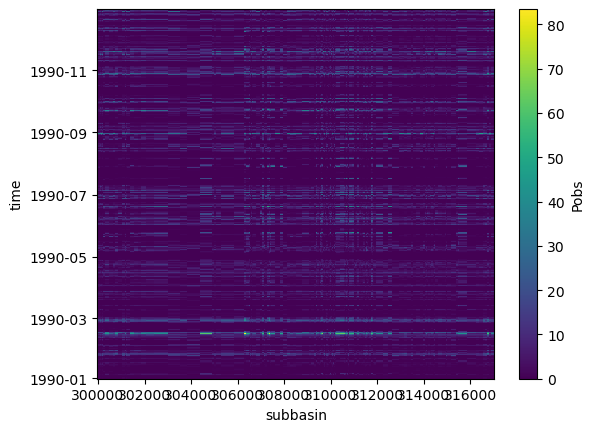

In [5]:
ds.Pobs.plot()

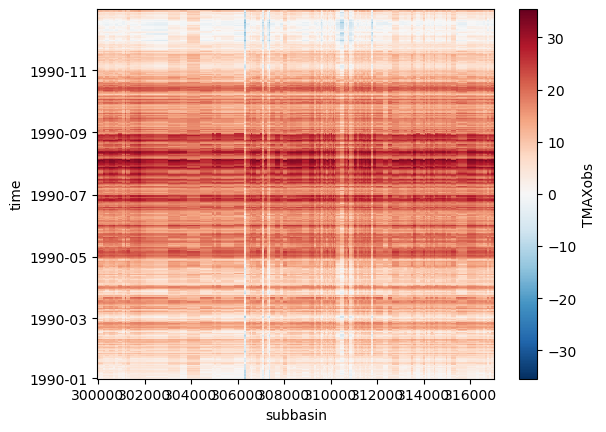

In [6]:
ds.TMAXobs.plot()

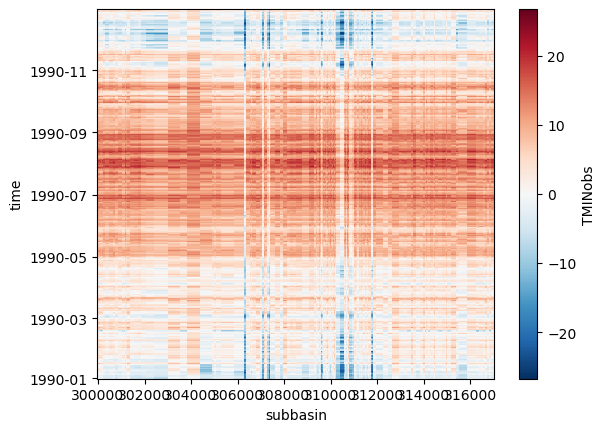

In [7]:
ds.TMINobs.plot()

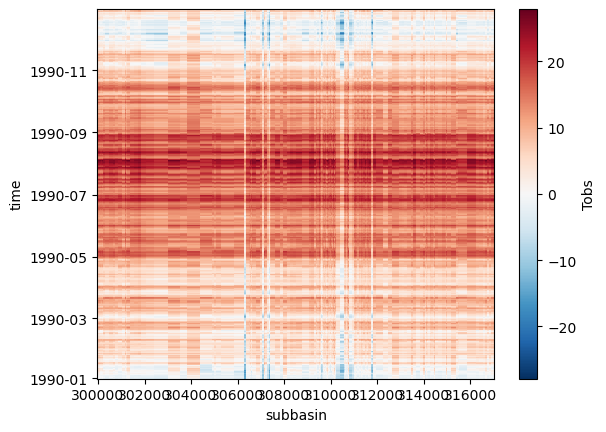

In [8]:
ds.Tobs.plot()